In [2]:
import pandas as pd

# Load the dataset
file_path = "heart.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nDataset Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 Rows of the Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1

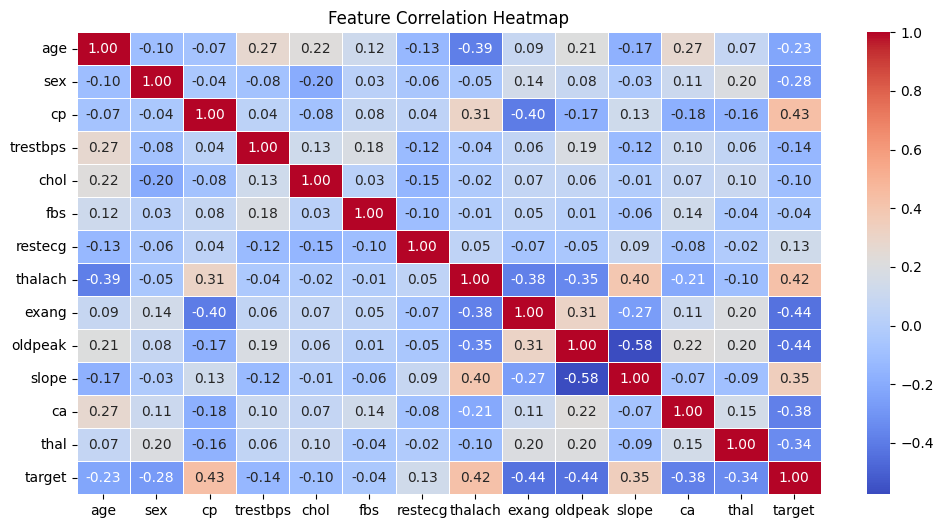

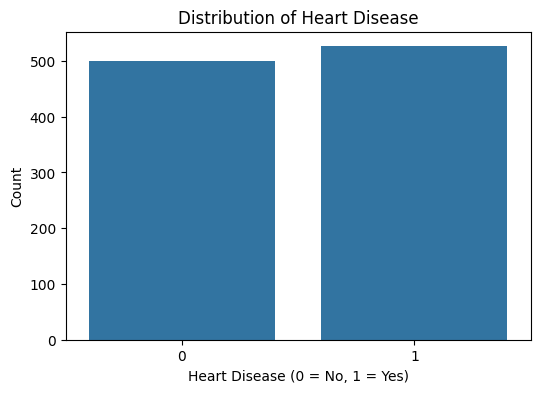

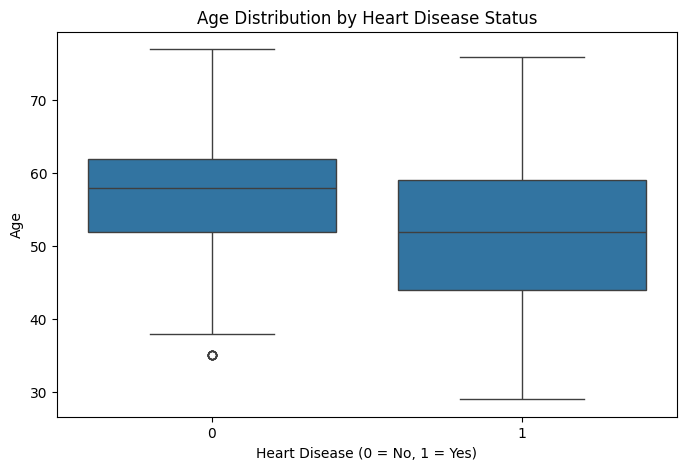

Correlation of FBS with target: -0.04
Preprocessed data saved to heart_preprocessed.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(file_path)

# Step 1: Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Impute numerical columns with mean

# Step 2: Convert Categorical Variables to Numerical
categorical_cols = df.select_dtypes(include=['object']).columns  # Identify categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future reference

# Step 3: Exploratory Data Analysis (EDA)

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'])  # Assuming 'target' is the column for heart disease presence
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Boxplot of Age vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['target'], y=df['age'])
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Check correlation of FBS (Fasting Blood Sugar)
if 'fbs' in df.columns:
    print(f"Correlation of FBS with target: {df['fbs'].corr(df['target']):.2f}")

# Save the preprocessed dataset
preprocessed_file = "heart_preprocessed.csv"
df.to_csv(preprocessed_file, index=False)
print(f"Preprocessed data saved to {preprocessed_file}")


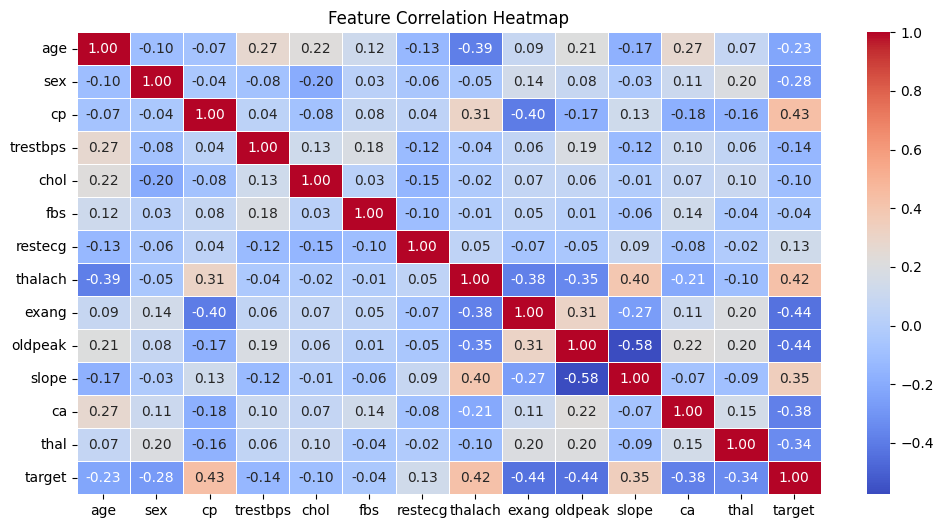


Top Features Based on Chi-Square Test:
    Feature  Chi-Square Score
8     exang        130.470927
2        cp         72.607974
11       ca         52.656480
9   oldpeak         40.911849
1       sex         24.373650
10    slope         16.836974
7   thalach          9.471895
12     thal          6.457822
6   restecg          4.869671
0       age          3.630553

Top Features Based on Random Forest Importance:
     Feature  Importance
2         cp    0.134201
7    thalach    0.120473
11        ca    0.116755
9    oldpeak    0.116151
12      thal    0.097043
0        age    0.089313
4       chol    0.078930
3   trestbps    0.074253
8      exang    0.059592
10     slope    0.048738


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load preprocessed dataset
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['target'])  # Independent variables
y = df['target']  # Dependent variable

# Step 1: Chi-Square Test for Categorical Features
# Normalize data for chi-square test
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Apply Chi-square test
chi_selector = SelectKBest(score_func=chi2, k='all')  # Select all features to rank them
chi_selector.fit(X_scaled, y)

# Create DataFrame of feature scores
chi_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi_selector.scores_})
chi_scores = chi_scores.sort_values(by='Chi-Square Score', ascending=False)

# Step 2: Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 3: Correlation Analysis (Numerical Features)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Print Top Features from Chi-Square and Random Forest
print("\nTop Features Based on Chi-Square Test:")
print(chi_scores.head(10))

print("\nTop Features Based on Random Forest Importance:")
print(feature_importance.head(10))


Training Logistic Regression...
Training Support Vector Machine...
Training Decision Tree...
Training Random Forest...
Training Naive Bayes...
Training Multilayer Perceptron...


C:\Users\shahh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Model: Logistic Regression
Accuracy: 0.8098
ROC-AUC: 0.9298
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Model: Support Vector Machine
Accuracy: 0.9268
ROC-AUC: 0.9771
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


Model: Decision Tree
Accuracy: 0.9854
ROC-AUC: 0.9857
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

  

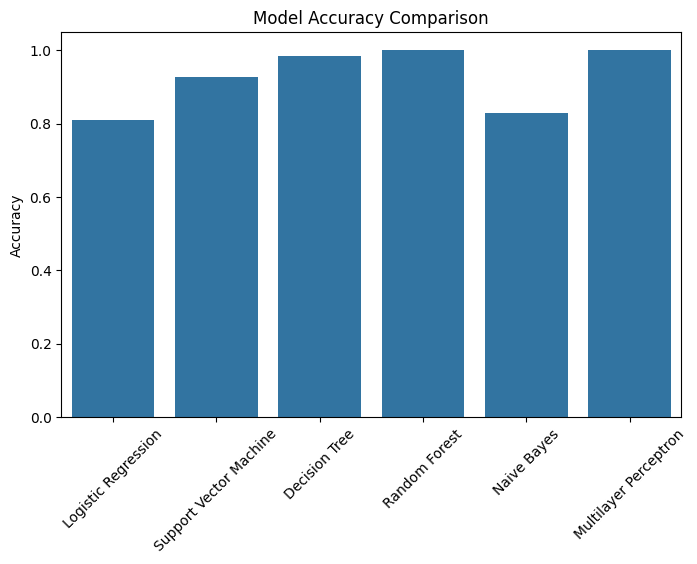

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Load preprocessed dataset
df = pd.read_csv(file_path)

# Split features and target variable
X = df.drop(columns=['target'])  # Independent variables
y = df['target']  # Dependent variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for SVM and MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Train & evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Get probabilities if available
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results[name] = {
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Classification Report": classification_report(y_test, y_pred)
    }

# Print results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}" if metrics['ROC-AUC'] else "ROC-AUC: N/A")
    print(metrics["Classification Report"])

# Visualize Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[metrics["Accuracy"] for metrics in results.values()])
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [10]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
df = pd.read_csv(file_path)

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model with optimal parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
pickle.dump(rf_model, open("random_forest_model.pkl", "wb"))
pickle.dump(scaler, open("standard_scaler.pkl", "wb"))

print("✅ Random Forest Model and StandardScaler saved successfully!")


✅ Random Forest Model and StandardScaler saved successfully!


In [11]:
rf_model


RandomForestClassifier(max_depth=10, random_state=42)

In [12]:
scaler

StandardScaler()